# Geant4 Analysis
Paper plots for the Instrument

In [1]:
# Import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data
geant_e = pd.read_csv('./Data/GEANT4-OUTPUT/electron_bg.csv').to_numpy().T
geant_p = pd.read_csv('./Data/GEANT4-OUTPUT/proton_bg.csv').to_numpy().T

In [100]:
# Manage the data
TAIL_e = 30000000
TAIL_p = 3000000
input_energy    = np.array([geant_e[2][:TAIL_e],np.append(geant_p[2][:TAIL_p],[0]*(TAIL_e-TAIL_p),axis=0)])
crystal_energy  = np.array([geant_e[3:7].T[:int(TAIL_e//4)].T.flatten(),np.append(geant_p[3:7].T[:TAIL_p//4].T.flatten(),[0]*(4*((TAIL_e-TAIL_p)//4)))])

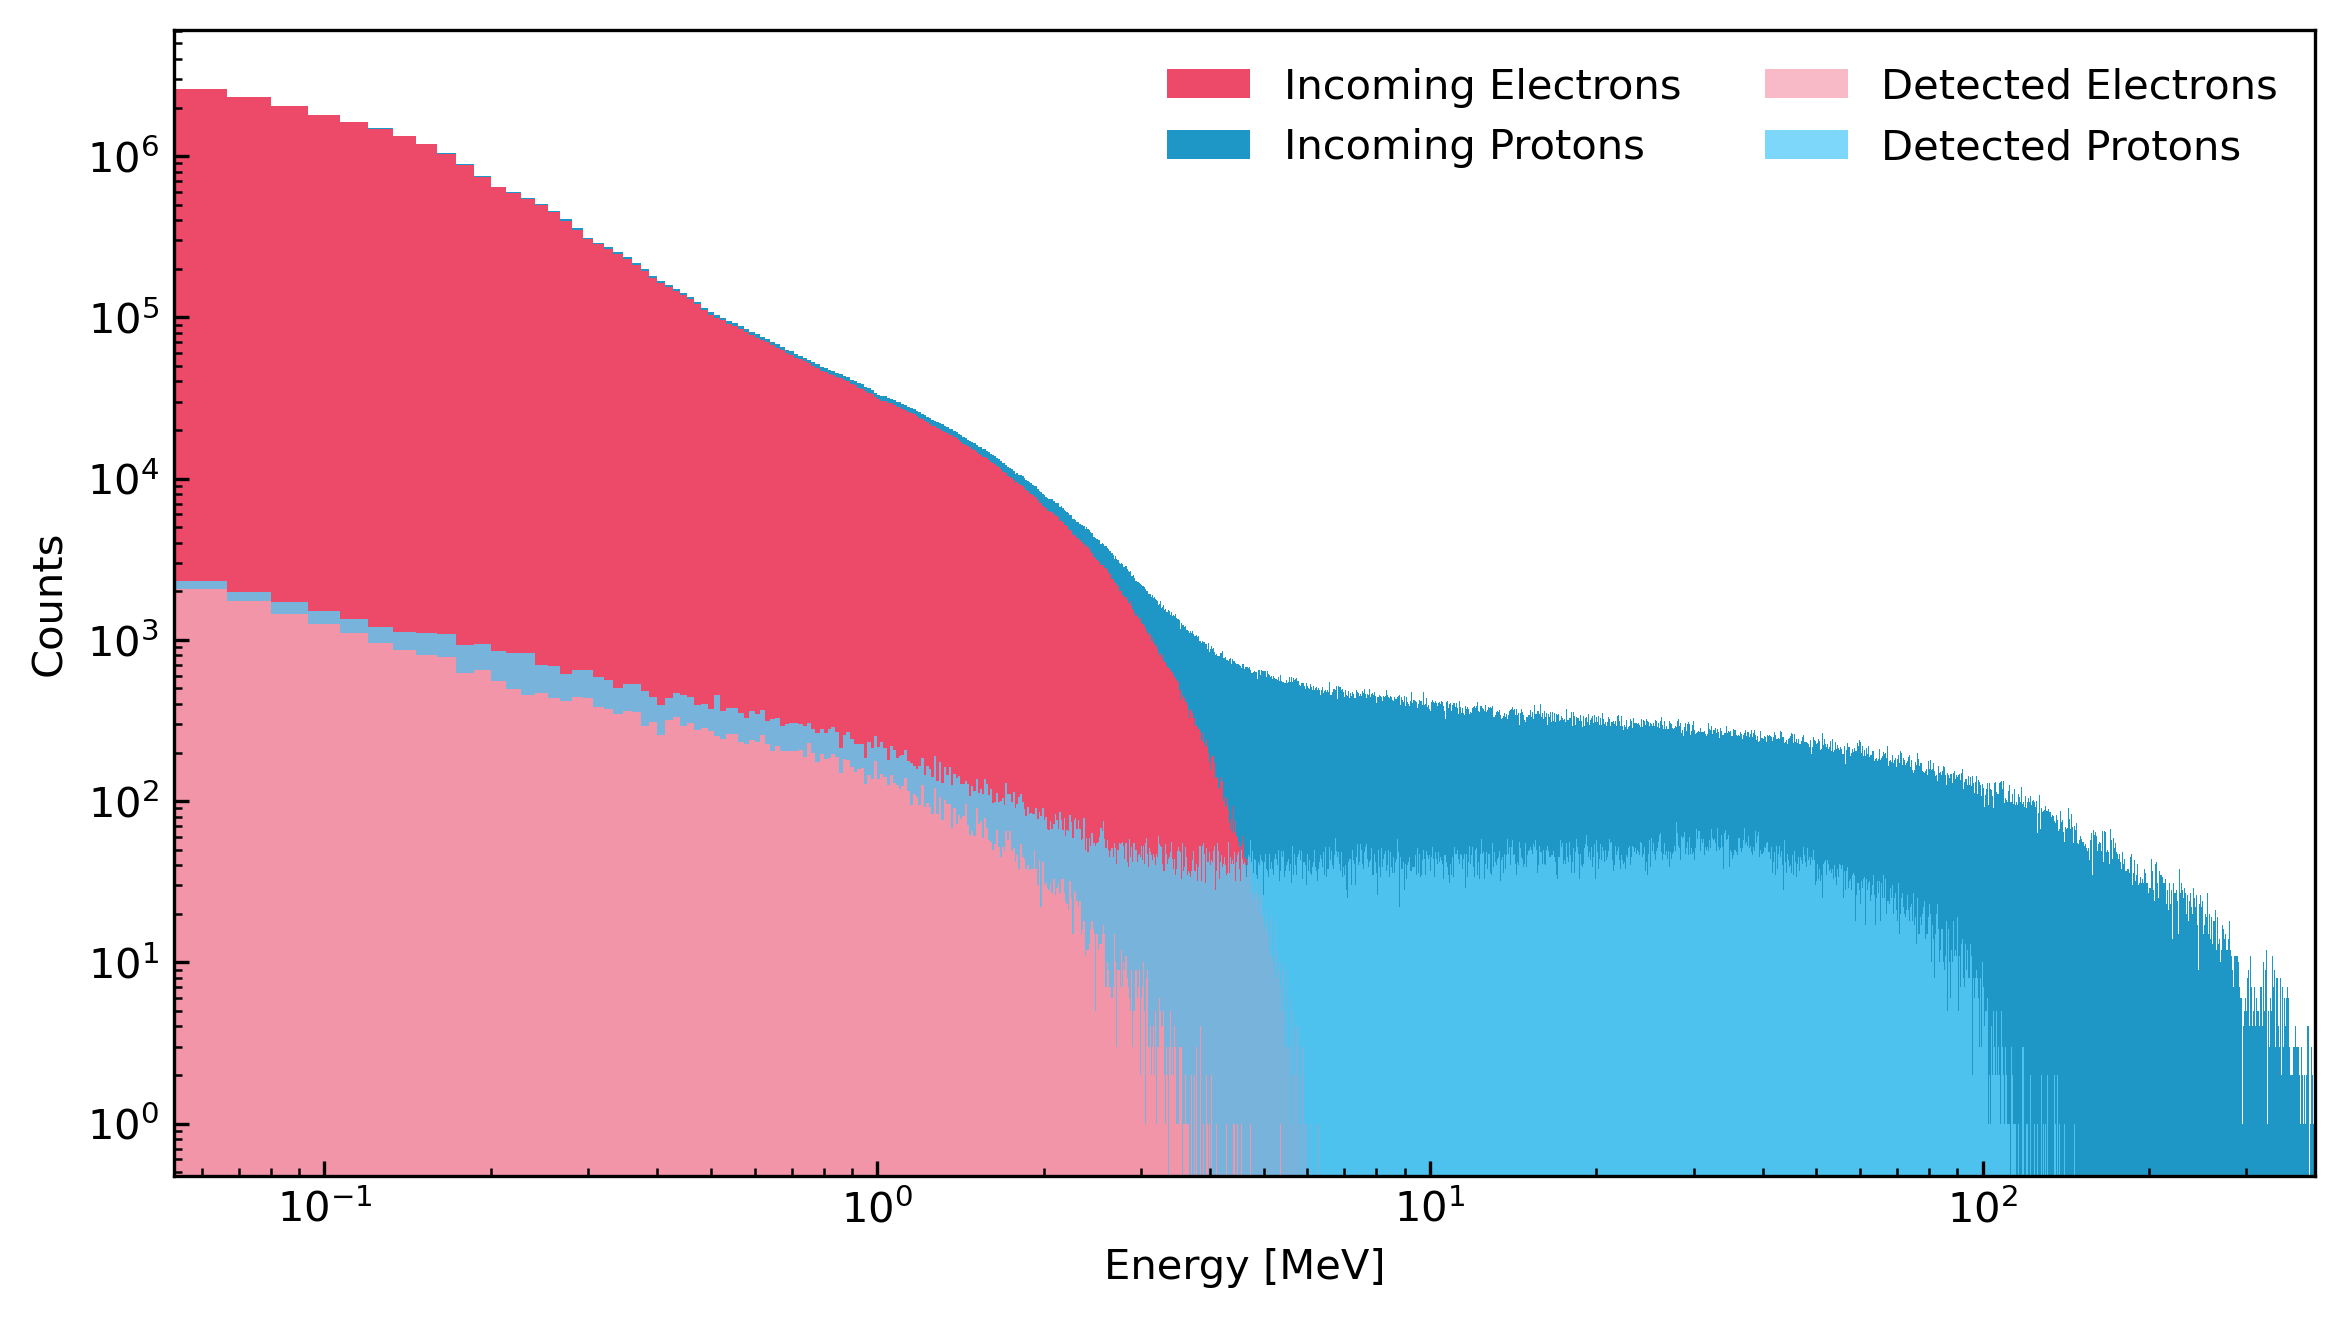

In [101]:
# Create the stacked histogram

# Build the figure
CMTOIN = 0.393701*1.8
fig    = plt.figure(figsize=(13*CMTOIN,7*CMTOIN),dpi=300)
fig.tight_layout(pad=3)
ax     = fig.add_subplot(111)

# Set the colors of the histogram
colors_i    = ['#ED4A6A','#1F97C6']
colors_o    = ['#f5a9b8','#5bcefa']
bins     =  np.linspace(np.min(input_energy[0]),np.max(input_energy[1]),30000)

# Plot the input energy histogram
ax.hist(input_energy.T,bins=bins,stacked=True,color=colors_i,label=['Incoming Electrons','Incoming Protons']);
ax.hist(crystal_energy.T,bins=bins,stacked=True,color=colors_o,alpha=0.8,label=['Detected Electrons','Detected Protons']);

# Prettify
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(bins[1],bins[-1])
ax.legend(frameon=False,loc='upper right',ncol=2)
ax.tick_params(axis = 'both', which = 'both', direction='in')
ax.set_xlabel('Energy [MeV]')
ax.set_ylabel('Counts');

In [103]:
fig.savefig("geant4-spectra.png", format="png", bbox_inches="tight")

KeyboardInterrupt: 

In [104]:
# Manage the data
TAIL_e = 30000000
TAIL_p = 3000000
input_energy    = [geant_e[2][:TAIL_e],geant_p[2][:TAIL_p]]
crystal_energy  = [np.sum(geant_e[3:7].T[:int(TAIL_e)].T,axis=0),np.sum(geant_p[3:7].T[:int(TAIL_p)].T,axis=0)]
veto_energy     = [geant_e[7][:TAIL_e],geant_p[7][:TAIL_p]]

Text(0, 0.5, 'Deposited Energy on Veto [MeV]')

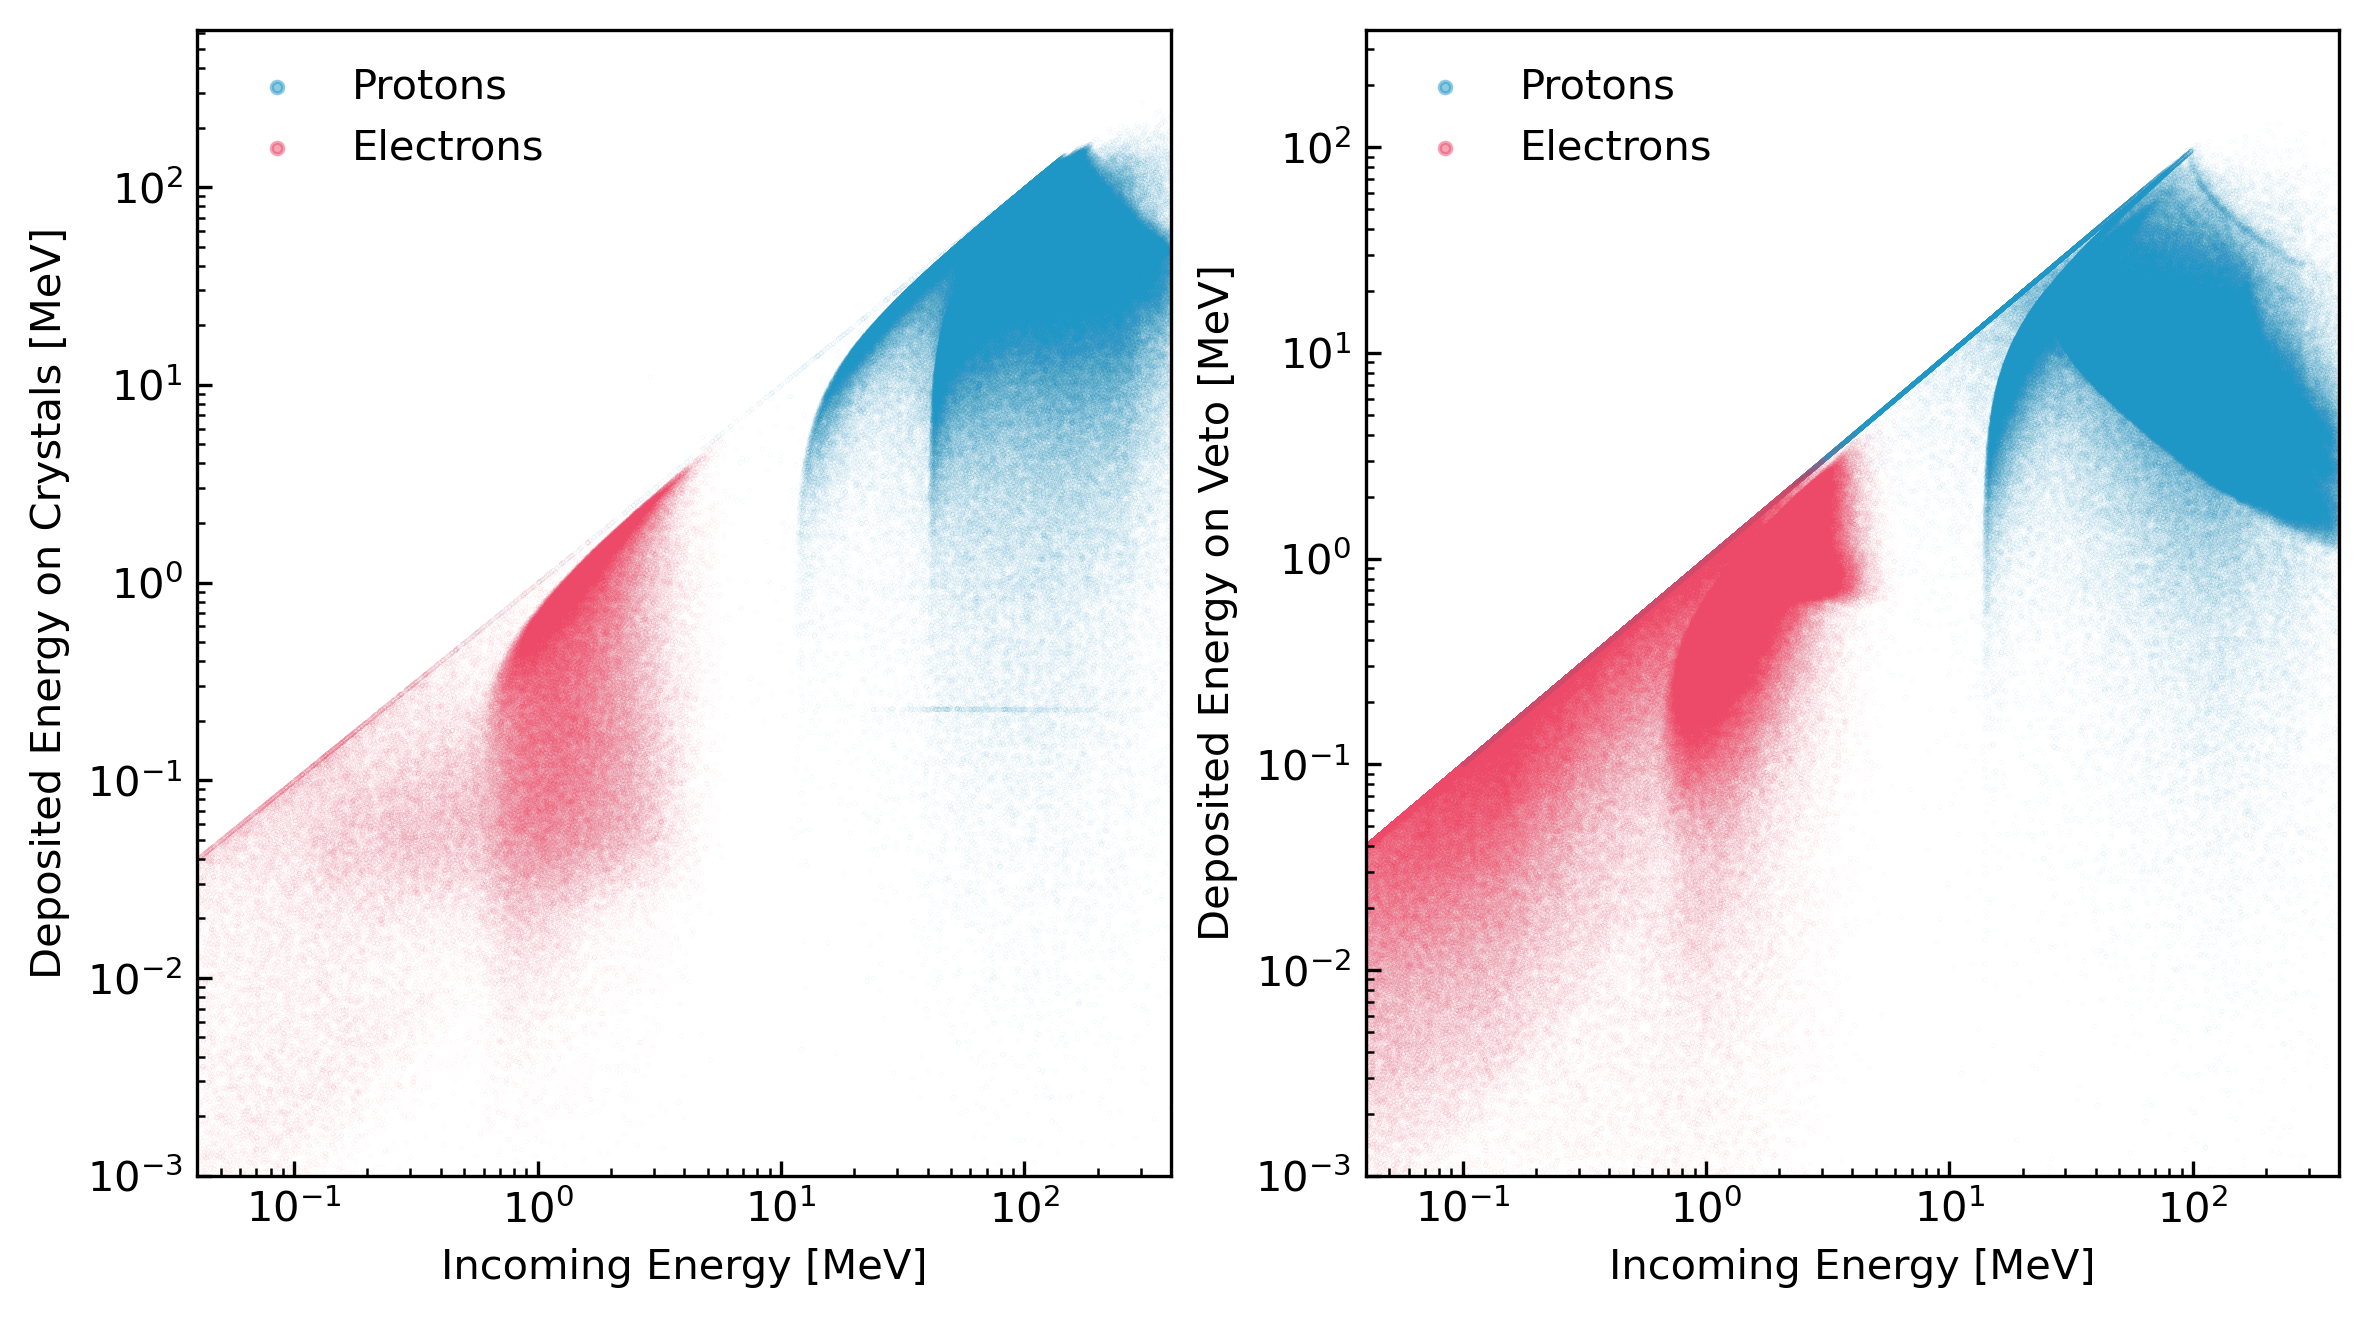

In [105]:
# Build the figure
CMTOIN = 0.393701*1.8
fig    = plt.figure(figsize=(13*CMTOIN,7*CMTOIN),dpi=300)
fig.tight_layout(pad=3)
ax1    = fig.add_subplot(121)
ax2    = fig.add_subplot(122)

# Set the labels
labels      = ['Electrons','Protons']
colors_i    = ['#ED4A6A','#1F97C6']

## Plot the scatter
for i in range(len(input_energy)-1,-1,-1): ax1.scatter(input_energy[i],crystal_energy[i],s=0.001,marker='.',c=colors_i[i],alpha=0.5,label=labels[i])

## Plot the veto stuff
for i in range(len(input_energy)-1,-1,-1): ax2.scatter(input_energy[i],veto_energy[i],s=0.001,marker='.',c=colors_i[i],alpha=0.5,label=labels[i])

## Prettify
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(1e-3)
legend1 = ax1.legend(frameon=False,loc='upper left')
legend1.legendHandles[0]._sizes = [30]
legend1.legendHandles[1]._sizes = [30]
ax1.tick_params(axis = 'both', which = 'both', direction='in')
ax1.set_xlim(min(input_energy[0]),max(input_energy[1]))
ax1.set_xlabel('Incoming Energy [MeV]')
ax1.set_ylabel('Deposited Energy on Crystals [MeV]')

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim(1e-3)
legend2 = ax2.legend(frameon=False,loc='upper left')
legend2.legendHandles[0]._sizes = [30]
legend2.legendHandles[1]._sizes = [30]
ax2.tick_params(axis = 'both', which = 'both', direction='in')
ax2.set_xlim(min(input_energy[0]),max(input_energy[1]))
ax2.set_xlabel('Incoming Energy [MeV]')
ax2.set_ylabel('Deposited Energy on Veto [MeV]')

In [106]:
fig.savefig("geant4-scatter.png", format="png", bbox_inches="tight")

Text(0, 0.5, 'Deposited Energy on Veto [MeV]')

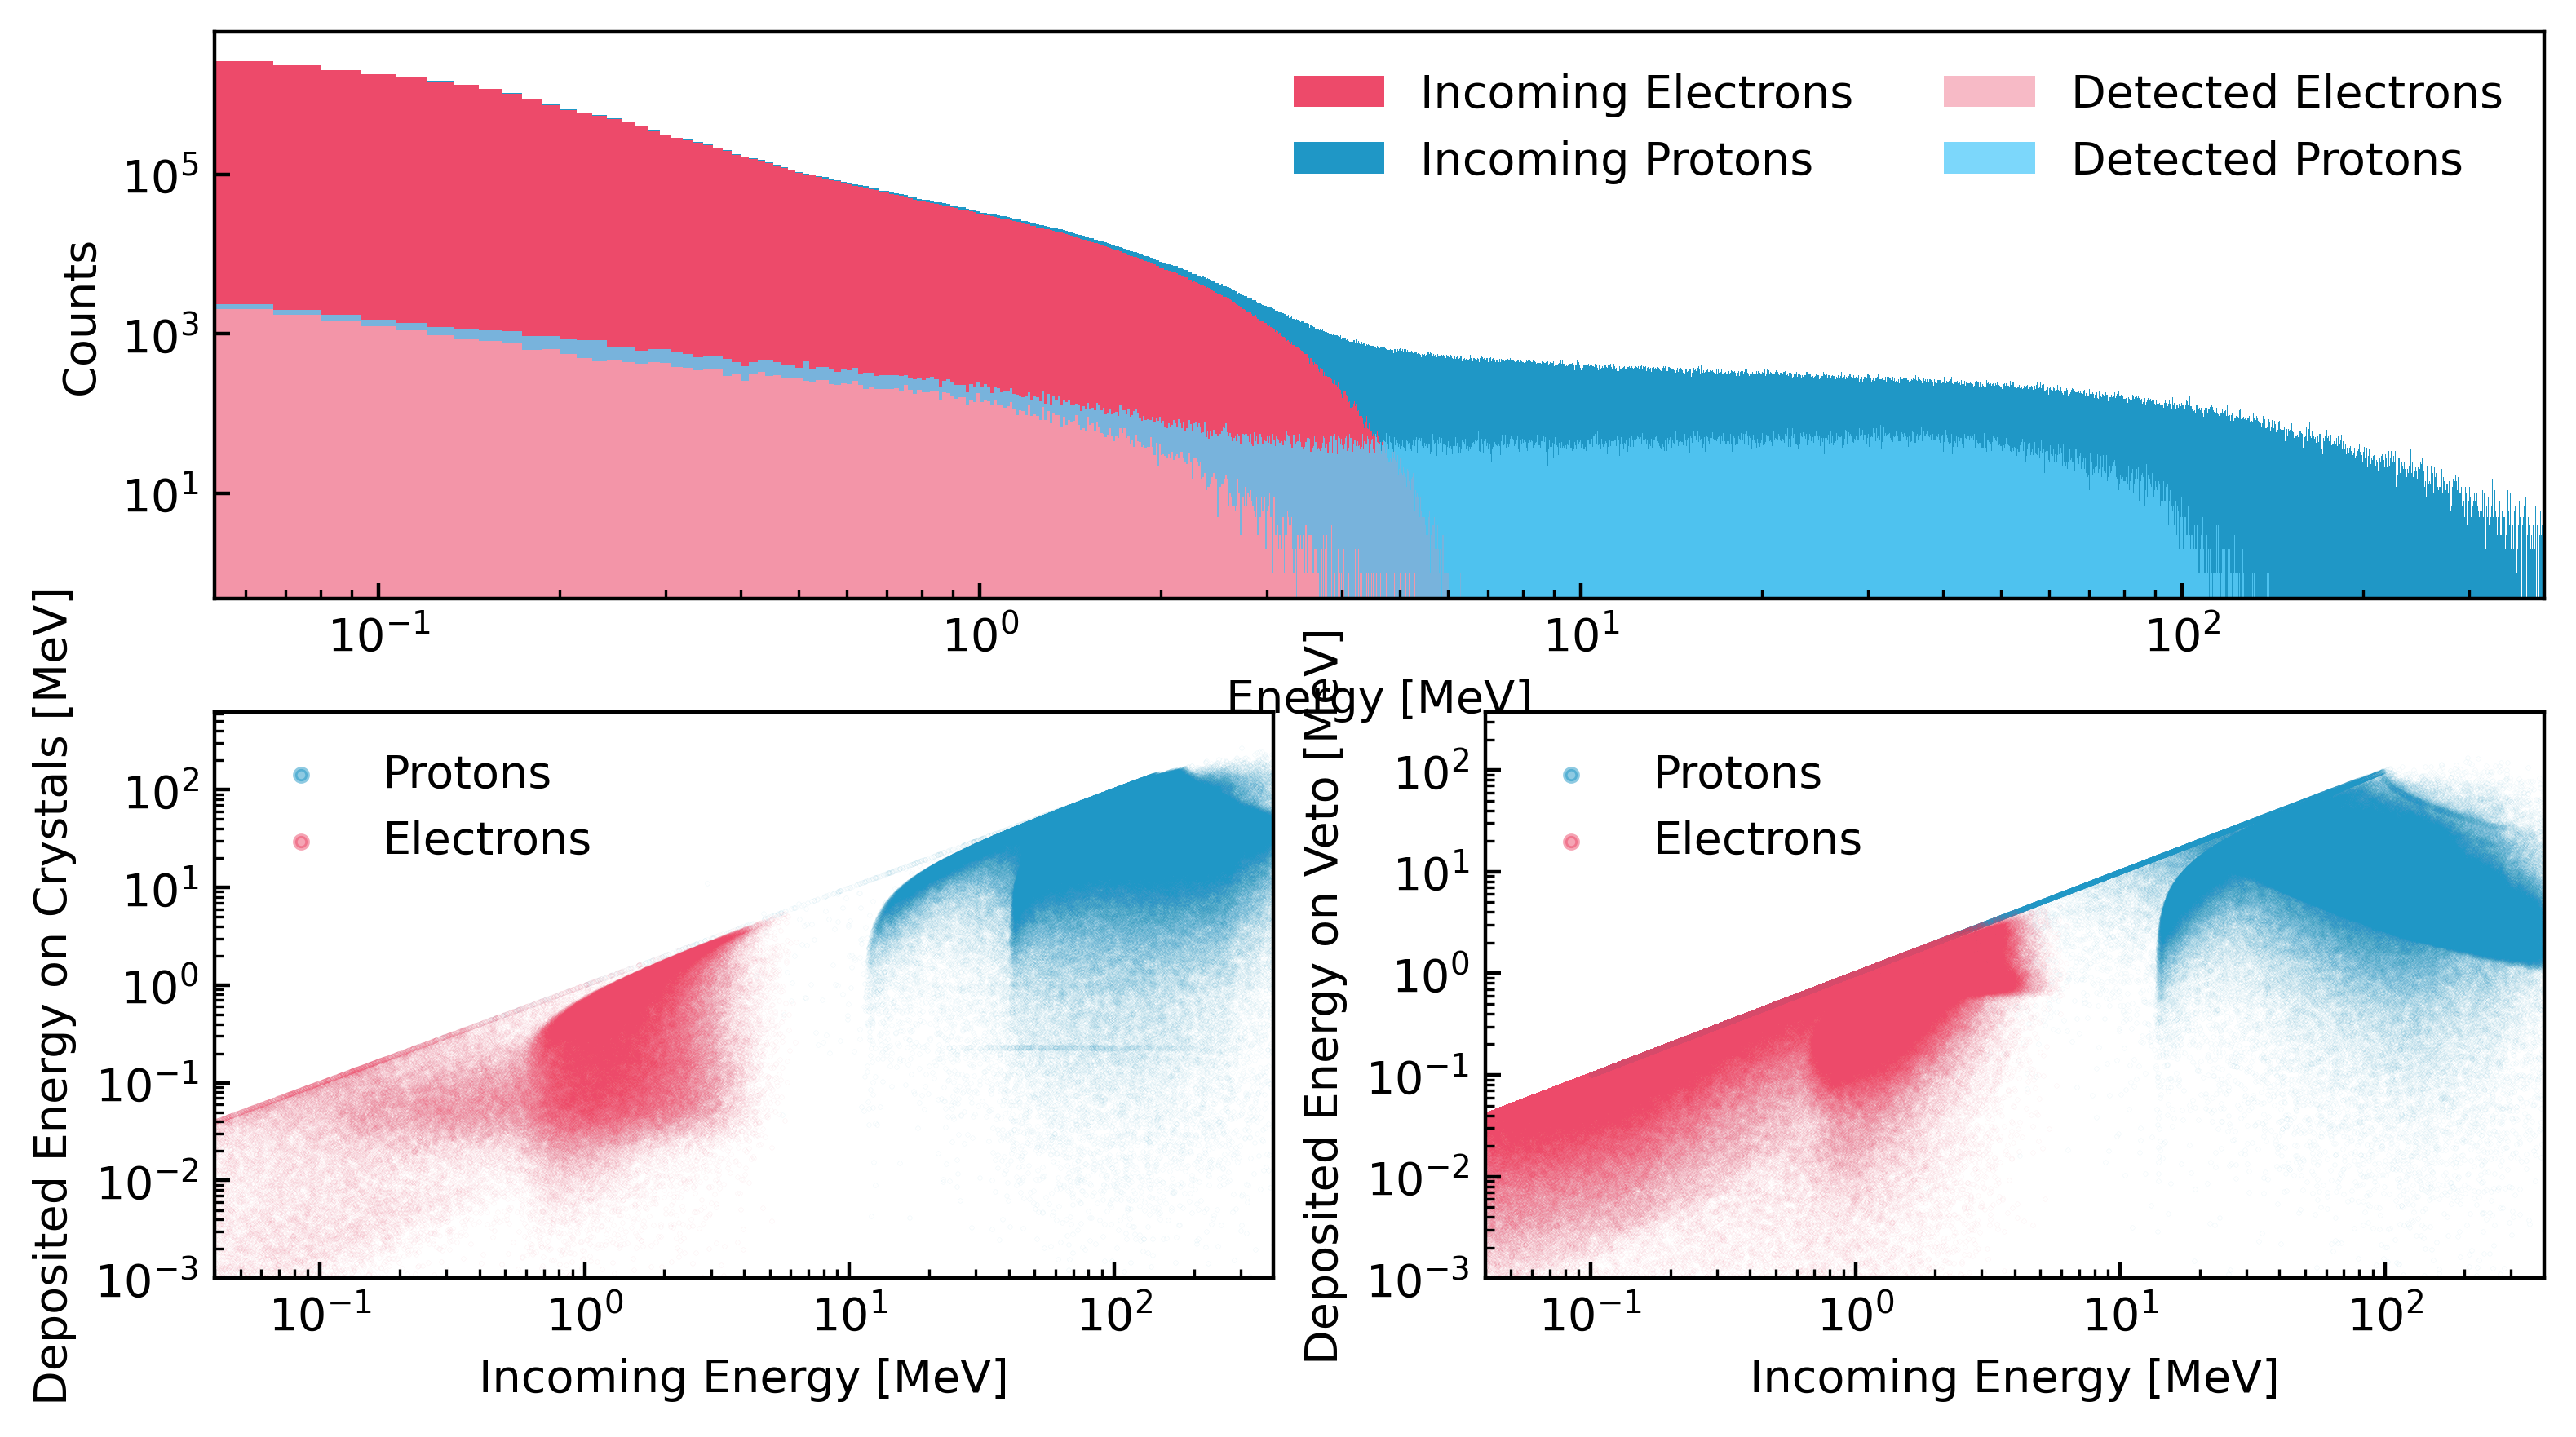

In [98]:
# Create a bunfle figure

# Get the first set of data

# Manage the data
TAIL_e = 30000000
TAIL_p = 3000000
input_energy    = np.array([geant_e[2][:TAIL_e],np.append(geant_p[2][:TAIL_p],[0]*(TAIL_e-TAIL_p),axis=0)])
crystal_energy  = np.array([geant_e[3:7].T[:int(TAIL_e//4)].T.flatten(),np.append(geant_p[3:7].T[:TAIL_p//4].T.flatten(),[0]*(4*((TAIL_e-TAIL_p)//4)))])

# Build the figure
CMTOIN = 0.393701*1.8
fig    = plt.figure(figsize=(13*CMTOIN,7*CMTOIN),dpi=400)
fig.tight_layout(pad=3)
ax     = fig.add_subplot(2,1,1)
ax1    = fig.add_subplot(2,2,3)
ax2    = fig.add_subplot(2,2,4)


# Set the colors of the histogram
colors_i    = ['#ED4A6A','#1F97C6']
colors_o    = ['#f5a9b8','#5bcefa']
bins     =  np.linspace(np.min(input_energy[0]),np.max(input_energy[1]),30000)

# Plot the input energy histogram
ax.hist(input_energy.T,bins=bins,stacked=True,color=colors_i,label=['Incoming Electrons','Incoming Protons']);
ax.hist(crystal_energy.T,bins=bins,stacked=True,color=colors_o,alpha=0.8,label=['Detected Electrons','Detected Protons']);

# Prettify
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(bins[1],bins[-1])
ax.legend(frameon=False,loc='upper right',ncol=2)
ax.tick_params(axis = 'both', which = 'both', direction='in')
ax.set_xlabel('Energy [MeV]')
ax.set_ylabel('Counts');

# Manage the data
TAIL_e = 30000000
TAIL_p = 3000000
input_energy    = [geant_e[2][:TAIL_e],geant_p[2][:TAIL_p]]
crystal_energy  = [np.sum(geant_e[3:7].T[:int(TAIL_e)].T,axis=0),np.sum(geant_p[3:7].T[:int(TAIL_p)].T,axis=0)]
veto_energy     = [geant_e[7][:TAIL_e],geant_p[7][:TAIL_p]]

# Set the labels
labels      = ['Electrons','Protons']

## Plot the scatter
for i in range(len(input_energy)-1,-1,-1): ax1.scatter(input_energy[i],crystal_energy[i],s=0.001,marker='.',c=colors_i[i],alpha=0.5,label=labels[i])

## Plot the veto stuff
for i in range(len(input_energy)-1,-1,-1): ax2.scatter(input_energy[i],veto_energy[i],s=0.001,marker='.',c=colors_i[i],alpha=0.5,label=labels[i])

## Prettify
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(1e-3)
legend1 = ax1.legend(frameon=False,loc='upper left')
legend1.legendHandles[0]._sizes = [30]
legend1.legendHandles[1]._sizes = [30]
ax1.tick_params(axis = 'both', which = 'both', direction='in')
ax1.set_xlim(min(input_energy[0]),max(input_energy[1]))
ax1.set_xlabel('Incoming Energy [MeV]')
ax1.set_ylabel('Deposited Energy on Crystals [MeV]')

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim(1e-3)
legend2 = ax2.legend(frameon=False,loc='upper left')
legend2.legendHandles[0]._sizes = [30]
legend2.legendHandles[1]._sizes = [30]
ax2.tick_params(axis = 'both', which = 'both', direction='in')
ax2.set_xlim(min(input_energy[0]),max(input_energy[1]))
ax2.set_xlabel('Incoming Energy [MeV]')
ax2.set_ylabel('Deposited Energy on Veto [MeV]')